<a href="https://colab.research.google.com/github/Anushreebasics/project1-stockMarketPrediction-/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('/content/infolimpioavanzadoTarget.csv')

In [7]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [8]:
df.tail()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
390,2022-07-25,2.32,2.320,2.105,2.105,2.105,26240,ASLN,36.785454,48.464249,...,3.15,0.000000,0.392156,0.000000,0.392156,-0.392156,0.933144,0.160,8.226226,1.0
391,2022-07-26,2.25,2.250,2.110,2.250,2.250,31160,ASLN,43.631618,49.081351,...,3.15,13.875595,4.625198,13.875595,4.625198,9.250397,1.108108,0.115,5.386417,1.0
392,2022-07-27,2.20,2.315,2.100,2.315,2.315,78300,ASLN,46.418717,54.655296,...,2.95,25.294131,13.056576,25.294131,13.056576,12.237556,2.784495,0.235,11.298071,1.0
393,2022-07-28,2.33,2.330,2.200,2.245,2.245,16160,ASLN,43.913401,47.336687,...,2.95,17.058818,18.742848,17.058818,18.742848,-1.684030,0.574680,0.305,15.721654,1.0
394,2022-07-29,2.25,2.400,2.210,2.315,2.315,9780,ASLN,46.979434,46.649530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Columns: 1285 entries, date to TARGET
dtypes: float64(1281), int64(2), object(2)
memory usage: 3.9+ MB


In [10]:
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,395.000000,395.000000,395.000000,395.000000,395.000000,3.950000e+02,365.000000,365.000000,345.000000,345.000000,...,366.000000,366.000000,362.000000,366.000000,362.000000,362.000000,394.000000,389.000000,389.000000,394.000000
mean,11.769127,12.035838,11.498737,11.749532,11.749532,1.227438e+05,46.190337,50.038351,46.643811,50.125301,...,13.044541,45.042926,45.121715,45.042926,45.121715,0.241789,1.481472,-0.055231,-0.254310,0.215736
std,6.489911,6.577393,6.399247,6.505865,6.505865,2.211719e+05,14.200733,5.541435,10.534940,4.031695,...,6.845922,30.920535,29.263910,30.920535,29.263910,10.749809,2.000929,0.808888,7.992082,0.411855
min,1.810000,1.940000,1.780000,1.800000,1.800000,4.920000e+03,7.260120,40.924816,23.508970,44.770056,...,2.490000,0.000000,0.392156,0.000000,0.392156,-36.009395,0.174964,-2.700001,-20.976251,0.000000
25%,4.375000,4.550000,4.175000,4.342500,4.342500,4.220000e+04,37.310769,47.001259,40.350474,48.207188,...,4.700000,15.499717,17.576264,15.499717,17.576264,-5.834357,0.691323,-0.470000,-5.755396,0.000000
50%,14.540000,14.810000,14.240000,14.510000,14.510000,7.910000e+04,46.979434,48.521252,46.721997,49.087268,...,16.090000,42.062698,39.406022,42.062698,39.406022,-0.206116,1.028234,-0.090000,-1.080350,0.000000
75%,16.209999,16.534500,15.780000,16.195000,16.195000,1.326000e+05,54.624737,50.967558,51.337440,50.684707,...,17.934999,74.232816,73.251502,74.232816,73.251502,6.636598,1.673067,0.360001,4.033838,0.000000
max,21.730000,21.760000,21.059999,21.520000,21.520000,3.018200e+06,85.704345,87.874402,76.901190,83.023385,...,21.760000,100.000000,95.701085,100.000000,95.701085,34.825371,26.041415,2.340000,36.749116,1.000000


<Axes: >

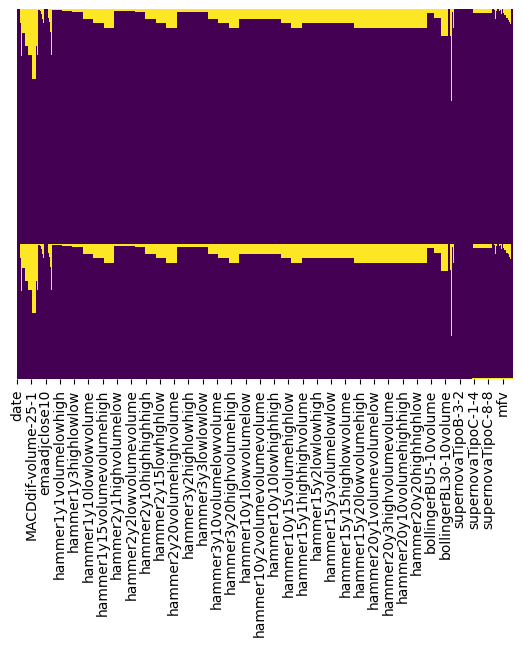

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [12]:
df2=df.iloc[:,0:8]

In [13]:
df2

,date,open,high,low,close,adjclose,volume,ticker
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE
...,...,...,...,...,...,...,...,...
390,2022-07-25,2.320000,2.320000,2.105000,2.105000,2.105000,26240,ASLN
391,2022-07-26,2.250000,2.250000,2.110000,2.250000,2.250000,31160,ASLN
392,2022-07-27,2.200000,2.315000,2.100000,2.315000,2.315000,78300,ASLN
393,2022-07-28,2.330000,2.330000,2.200000,2.245000,2.245000,16160,ASLN


In [14]:
df2.corr()

<ipython-input-14-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,open,high,low,close,adjclose,volume
open,1.000000,0.999233,0.999381,0.998695,0.998695,0.274835
high,0.999233,1.000000,0.999274,0.999398,0.999398,0.285951
low,0.999381,0.999274,1.000000,0.999378,0.999378,0.274683
close,0.998695,0.999398,0.999378,1.000000,1.000000,0.283173
adjclose,0.998695,0.999398,0.999378,1.000000,1.000000,0.283173
volume,0.274835,0.285951,0.274683,0.283173,0.283173,1.000000


In [15]:
df['date']=pd.to_datetime(df['date'])

<ipython-input-16-71fa05ff9a6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')


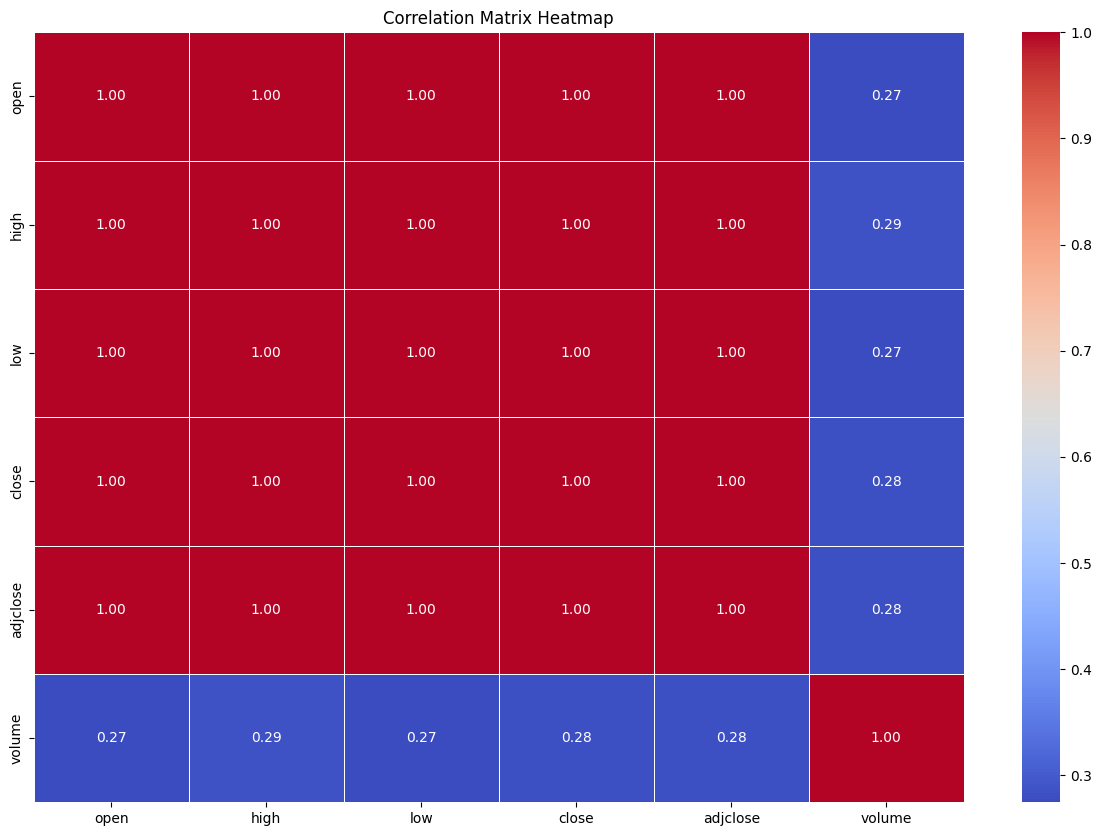

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [17]:
df.set_index('date', inplace=True)

lets analyse a historical view of the closing price

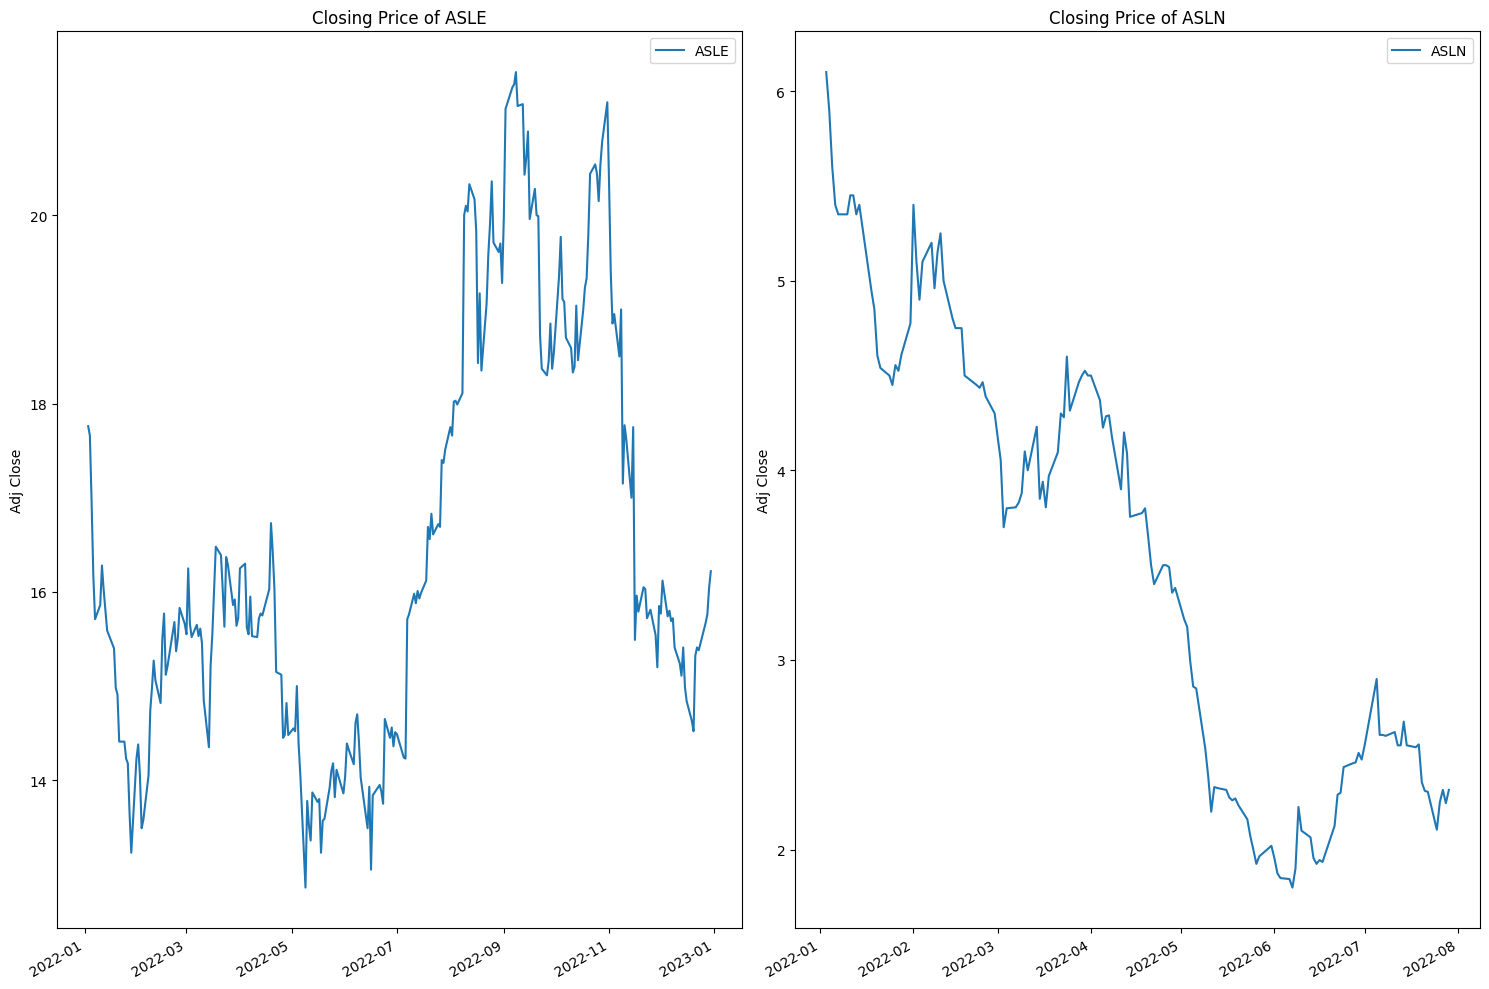

In [18]:

# Create subplots dynamically based on the number of unique tickers

unique_tickers = df['ticker'].unique()
num_rows = (len(unique_tickers) + 1) // 2
num_cols = 2

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=0.8 - 0.15 * num_rows)

# Iterate through tickers and plot closing prices
for i, ticker in enumerate(unique_tickers, 1):
    plt.subplot(num_rows, num_cols, i)

    # Select rows corresponding to the current ticker
    subset_df = df[df['ticker'] == ticker]

    # Plot 'adj close'
    subset_df['adjclose'].plot(label=ticker)

    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.legend()
    plt.title(f"Closing Price of {ticker}")

plt.tight_layout()
plt.show()


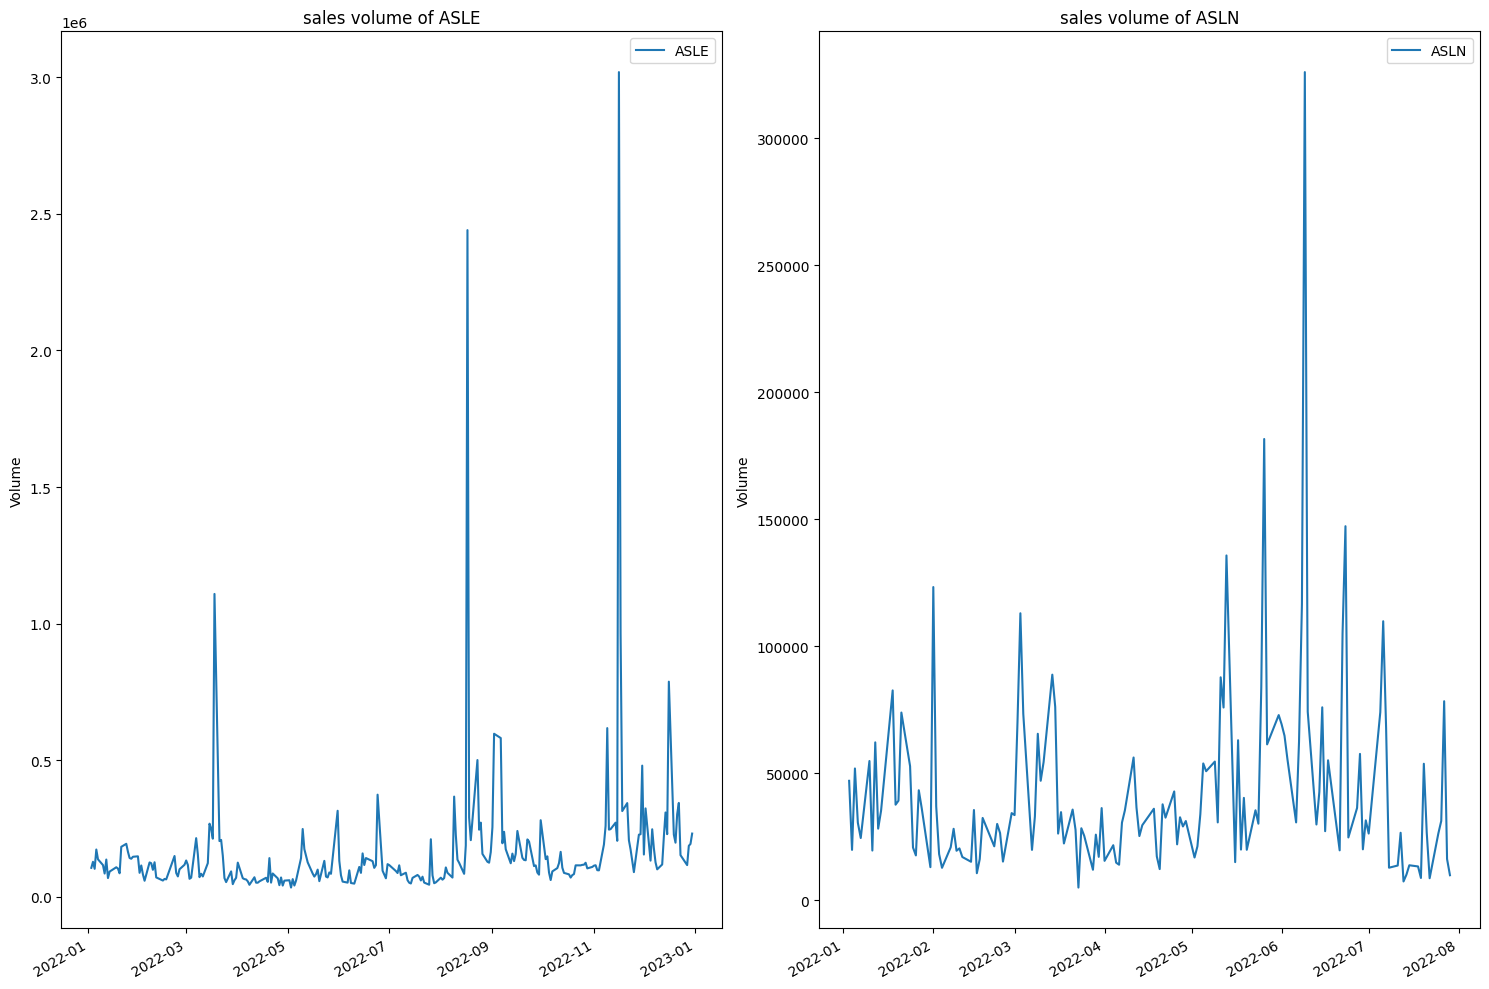

In [19]:
# Now let's plot the total volume of stock being traded each day
unique_tickers = df['ticker'].unique()
num_rows = (len(unique_tickers) + 1) // 2
num_cols = 2

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=0.8 - 0.15 * num_rows)

for i, ticker in enumerate(unique_tickers, 1):
    plt.subplot(num_rows, num_cols, i)

    # Select rows corresponding to the current ticker
    subset_df = df[df['ticker'] == ticker]

    # Plot 'volume'
    subset_df['volume'].plot(label=ticker)

    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.legend()
    plt.title(f"sales volume of {ticker}")

plt.tight_layout()
plt.show()

lets calculate the moving average(MA) of the various stocks

IndexError: ignored

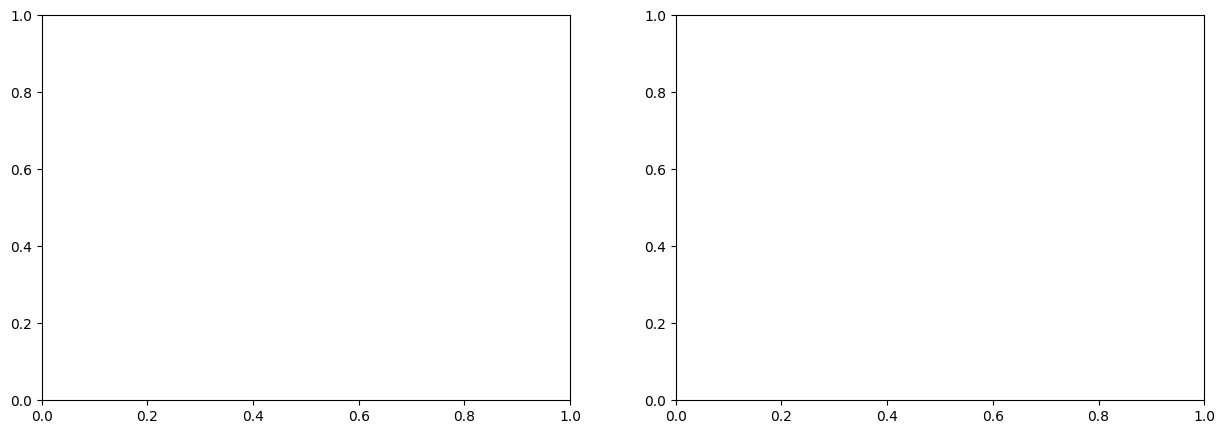

In [20]:

ma_day = [10, 20, 50]
for ma in ma_day:
    for ticker in df['ticker'].unique():
        column_name = f"MA for {ma} days"
        df.loc[df['ticker'] == ticker, column_name] = df.loc[df['ticker'] == ticker, 'adjclose'].rolling(ma).mean()

# Create subplots dynamically based on the number of unique tickers
num_rows = (len(df['ticker'].unique()) + 1) // 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols)
fig.set_figheight(5 * num_rows)
fig.set_figwidth(15)

for i, ticker in enumerate(df['ticker'].unique(), 1):
    row_index = (i - 1) // num_cols
    col_index = (i - 1) % num_cols

    df_ticker = df[df['ticker'] == ticker]

    df_ticker[['adjclose', f'MA for 10 days', f'MA for 20 days', f'MA for 50 days']].plot(ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(ticker)
    axes[row_index, col_index].set_xlabel('date')
    axes[row_index, col_index].set_ylabel('price')
    axes[row_index, col_index].legend()

fig.tight_layout()
plt.show()


lets see the daily return of the stock on an average

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'ticker' and 'Adj Close' columns

# Calculate daily returns for each ticker
for ticker in df['ticker'].unique():
    df.loc[df['ticker'] == ticker, 'Daily Return'] = df.loc[df['ticker'] == ticker, 'adjclose'].pct_change()

# Create subplots dynamically based on the number of unique tickers
num_rows = (len(df['ticker'].unique()) + 1) // 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols)
fig.set_figheight(5 * num_rows)
fig.set_figwidth(15)

for i, ticker in enumerate(df['ticker'].unique(), 1):
    row_index = (i - 1) // num_cols
    col_index = (i - 1) % num_cols

    df_ticker = df[df['ticker'] == ticker]

    df_ticker['Daily Return'].plot(ax=axes[row_index, col_index], legend=True, linestyle='--', marker='o')
    axes[row_index, col_index].set_title(ticker)
    axes[row_index, col_index].set_xlabel('date')
    axes[row_index, col_index].set_ylabel('Daily Return')
    axes[row_index, col_index].legend()

fig.tight_layout()
plt.show()


lets analyse it using histogram as well

In [ ]:
import math

plt.figure(figsize=(12, 9))

unique_tickers = df['ticker'].unique()

num_rows = math.ceil(len(unique_tickers) / 2)
num_cols = 2

for i, ticker in enumerate(unique_tickers, 1):
    plt.subplot(num_rows, num_cols, i)

    # Select rows corresponding to the current ticker
    df_ticker = df[df['ticker'] == ticker]

    # Plot histogram of daily returns
    df_ticker['Daily Return'].hist(bins=50, alpha=0.7)

    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{ticker}')

plt.tight_layout()
plt.show()


In [ ]:
# Grab all the closing prices for the tickers in your DataFrame into one DataFrame
closing_df = df.pivot(columns='ticker', values='adjclose')

# Make a new returns DataFrame
rets = closing_df.pct_change()

# Display the first few rows of the returns DataFrame
rets.head()


Now we can compare the daily percentage return of two stocks to check how correlated.

In [ ]:
# We'll use joinplot to compare the daily returns
sns.jointplot(x='ASLE', y='ASML', data=rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

In [ ]:
sns.pairplot(rets, kind='reg')

 we can see the plot between ASLE and ASML is giving us the best straight line

we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

just like we suspected in our pairplot we see here numerically and visually that ASLE and ASML had the strongest correlation of daily stock return.

lets see what is the risk in investing in each stock

In [ ]:
retu = rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(retu.mean(), retu.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(retu.columns, retu.mean(), retu.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

since ASO has the most expected return lets predict the closing price stock price of ASO

In [ ]:

start_date = '2022-01-01'
end_date = '2022-12-31'

dfaso= df[(df['ticker'] == 'ASO') & (df.index >= start_date) & (df.index <= end_date)]

dfaso

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(dfaso['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

PREDICTIVE MODELLING -2

In [ ]:
# Create a new dataframe with only the 'Close column
data = dfaso.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid
